In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df1 = pd.read_csv('C:\\Users\\gteja\\Desktop\\train_1.csv')
df2 = pd.read_csv('C:\\Users\\gteja\\Desktop\\test.csv')
print(df1.shape,df2.shape)

(1460, 81) (1459, 80)


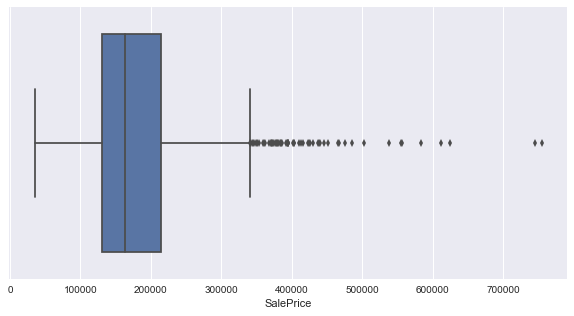





 755000


In [3]:
plt.figure(figsize=(10,5))
sns.boxplot(df1.SalePrice)
plt.show()
print('\n'*4, df1.SalePrice.max())

In [4]:
df1.loc[df1.SalePrice == 755000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [5]:
df1 = df1.drop(df1.index[691])

In [6]:
#Train Data
Categorical_var_train = df1.select_dtypes(include=['object']).copy()
Numerical_var_train = df1.select_dtypes(include=['int64']).copy()
Float_var_train = df1.select_dtypes(include=['float64']).copy()

#Test Data
Categorical_var_test = df2.select_dtypes(include=['object']).copy()
Numerical_var_test = df2.select_dtypes(include=['int64']).copy()
Float_var_test = df2.select_dtypes(include=['float64']).copy()

In [7]:
# Combine Numerical and Floating objects horizontally along the x axis by passing in axis=1.

#Train Data
Num_var_train = pd.concat([Numerical_var_train,Float_var_train], axis=1)
Num_var_train = np.log1p(Num_var_train)

#Test Data
Num_var_test = pd.concat([Numerical_var_test,Float_var_test], axis=1)
Num_var_test = np.log1p(Num_var_test)

In [8]:
print(Num_var_train.shape,Num_var_test.shape)

(1459, 38) (1459, 37)


In [9]:
Num_var_train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
      dtype='object')

In [10]:
#Checking Missing values and the columns that have numerical value but belong to categorical features

# In this case a value zero was given indicating that the column did not have that feature 

#Train Data
Num_var_train.isnull().any()
Num_var_train = Num_var_train.fillna(0)
Num_var_train = Num_var_train.drop(['Id','MSSubClass','OverallQual','OverallCond','SalePrice','MoSold'],axis=1)

#Test Data

Num_var_test.isnull().any()
Num_var_test = Num_var_test.fillna(0)
Num_var_test = Num_var_test.drop(['Id','MSSubClass','OverallQual','OverallCond','MoSold'],axis=1)

In [11]:
print(Num_var_train.shape,Num_var_test.shape)

(1459, 32) (1459, 32)


In [12]:
#Checking for Multicollinearity
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif = pd.DataFrame()
#vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif['features'] = X.columns
#vif.round(1)

In [13]:
#Concatening the columns from the numeric data (that had categorical features) to the Categorical data.

#Train Data
d5 = df1[['MSSubClass','OverallQual','OverallCond']]
Catg_var_train = pd.concat([Categorical_var_train,d5], axis=1)
d6 = pd.DataFrame(Catg_var_train) 
d6.head(5)

#Test Data
d5_1 = df2[['MSSubClass','OverallQual','OverallCond']]
Catg_var_test = pd.concat([Categorical_var_test,d5_1], axis=1)
d7 = pd.DataFrame(Catg_var_test)
d7.head(5)
print('\n'*2, d6.shape,d7.shape)



 (1459, 46) (1459, 46)


In [14]:
d6.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual',
       'OverallCond'],
      dtype='object')

In [15]:
#d6.isnull().any()

In [16]:
#Filling the missing values based on the Data Description of the Columns

#Train Data
d6.Alley = d6.Alley.fillna('No')
d6.MasVnrType = d6.MasVnrType.fillna('None')
d6.BsmtQual = d6.BsmtQual.fillna('No Basement')
d6.BsmtCond = d6.BsmtCond.fillna('No Basement')
d6.BsmtExposure = d6.BsmtExposure.fillna('No Basement')
d6.BsmtFinType1 = d6.BsmtFinType1.fillna('No Basement')
d6.BsmtFinType2 = d6.BsmtFinType2.fillna('No Basement')
d6.Electrical = d6.Electrical.fillna('Missin data')
d6.FireplaceQu = d6.FireplaceQu.fillna('No Fireplace')
d6.GarageType = d6.GarageType.fillna('No Garage')
d6.GarageFinish = d6.GarageFinish.fillna('No Garage')
d6.GarageQual = d6.GarageQual.fillna('No Garage')
d6.GarageCond = d6.GarageCond.fillna('No Garage')
d6.PoolQC = d6.PoolQC.fillna('No Pool')
d6.Fence = d6.Fence.fillna('no Fence')
d6.MiscFeature = d6.MiscFeature.fillna('None')

#Test Data
d7.Alley = d7.Alley.fillna('No')
d7.MasVnrType = d7.MasVnrType.fillna('None')
d7.BsmtQual = d7.BsmtQual.fillna('No Basement')
d7.BsmtCond = d7.BsmtCond.fillna('No Basement')
d7.BsmtExposure = d7.BsmtExposure.fillna('No Basement')
d7.BsmtFinType1 = d7.BsmtFinType1.fillna('No Basement')
d7.BsmtFinType2 = d7.BsmtFinType2.fillna('No Basement')
d7.Electrical = d7.Electrical.fillna('Missin data')
d7.FireplaceQu = d7.FireplaceQu.fillna('No Fireplace')
d7.GarageType = d7.GarageType.fillna('No Garage')
d7.GarageFinish = d7.GarageFinish.fillna('No Garage')
d7.GarageQual = d7.GarageQual.fillna('No Garage')
d7.GarageCond = d7.GarageCond.fillna('No Garage')
d7.PoolQC = d7.PoolQC.fillna('No Pool')
d7.Fence = d7.Fence.fillna('no Fence')
d7.MiscFeature = d7.MiscFeature.fillna('None')

In [17]:
d6.head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond
0,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,No Pool,no Fence,None,WD,Normal,60,7,5
1,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Y,No Pool,no Fence,None,WD,Normal,20,6,8
2,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,No Pool,no Fence,None,WD,Normal,60,7,5
3,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,Y,No Pool,no Fence,None,WD,Abnorml,70,7,5
4,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Y,No Pool,no Fence,None,WD,Normal,60,8,5


In [18]:
print(d6.shape,d7.shape)

(1459, 46) (1459, 46)


In [19]:
#Replacing the numerical features with the categorical features for train and test categorical objects.

#Train Data
d6.MSSubClass = d6.MSSubClass.replace({20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"})
df1['MoSold'] = df1.MoSold.replace({1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"})

#Test Data
d7.MSSubClass = d7.MSSubClass.replace({20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"})
df2.MoSold = df2.MoSold.replace({1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"})

In [20]:
#Train Data
d6.OverallQual = d6.OverallQual.replace({ 10:'Very Excellent',
                                               9:'Excellent',
                                               8:'Very Good',
                                               7:'Good',
                                               6:'Above Average',   
                                               5:'Average',
                                               4:'Below Average',   
                                               3:'Fair',
                                               2:'Poor',
                                               1:'Very Poor'})
d6.OverallCond = d6.OverallCond.replace({10:'Very Excellent',
                                               9:'Excellent',
                                               8:'Very Good',
                                               7:'Good',
                                               6:'Above Average',   
                                               5:'Average',
                                               4:'Below Average',   
                                               3:'Fair',
                                               2:'Poor',
                                               1:'Very Poor'})

#Test Data
d7.OverallQual = d7.OverallQual.replace({ 10:'Very Excellent',
                                               9:'Excellent',
                                               8:'Very Good',
                                               7:'Good',
                                               6:'Above Average',   
                                               5:'Average',
                                               4:'Below Average',   
                                               3:'Fair',
                                               2:'Poor',
                                               1:'Very Poor'})
d7.OverallCond = d7.OverallCond.replace({10:'Very Excellent',
                                               9:'Excellent',
                                               8:'Very Good',
                                               7:'Good',
                                               6:'Above Average',   
                                               5:'Average',
                                               4:'Below Average',   
                                               3:'Fair',
                                               2:'Poor',
                                               1:'Very Poor'})

In [21]:
#Converting the replaced data into a Categorical variable

#Train Data
d6.MSSubClass = d6.MSSubClass.astype('category')
d6.OverallQual = d6.OverallQual.astype('category')
d6.OverallCond = d6['OverallCond'].astype('category')
df1.MoSold = df1.MoSold.astype('category')

#Test Data
d7.MSSubClass = d7.MSSubClass.astype('category')
d7.OverallQual = d7['OverallQual'].astype('category')
d7.OverallCond = d7['OverallCond'].astype('category')
df2.MoSold = df2.MoSold.astype('category')

In [22]:
d6 = pd.concat([df1.MoSold,d6],axis=1)
d7 = pd.concat([df2.MoSold,d7],axis=1)

In [23]:
print(d6.shape,d7.shape)

(1459, 47) (1459, 47)


In [24]:
#d6.info()

In [25]:
d6.MSZoning.value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [26]:
d7.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [27]:
#d6.MSSubClass.value_counts()

In [28]:
#d6.MSSubClass.value_counts()

In [29]:
#d7.OverallCond.value_counts()

In [30]:
#d6.isnull().any()

In [31]:
d6.columns

Index(['MoSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass',
       'OverallQual', 'OverallCond'],
      dtype='object')

In [32]:
d6 = d6.drop(['Utilities','Condition2','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Heating',
             'Electrical','GarageQual','PoolQC','MiscFeature'],axis=1)
d7 = d7.drop(['Utilities','Condition2','RoofMatl','Exterior1st','Exterior2nd','ExterCond','Heating',
             'Electrical','GarageQual','PoolQC','MiscFeature'],axis=1)

In [33]:
#Since the data is categorical we are creating dummies 

#Train Data
d6 = pd.get_dummies(d6, drop_first=True)
d6.head(5)


,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,...,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [34]:
#Test Data
d7 = pd.get_dummies(d7, drop_first=True)
d7.head(5)

,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,...,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [35]:
print(d6.shape,d7.shape)

(1459, 196) (1459, 196)


In [36]:
#Now we are concatening the numerical data and categorical data into a single dataframe

#Train Data
train = pd.concat([Num_var_train,d6],axis=1)
train.head(5)

#Test Data
test = pd.concat([Num_var_test,d7],axis=1)
train.head(5)

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor
0,9.042040,7.602900,7.602900,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,...,0,0,1,0,0,0,0,0,0,0
1,9.169623,7.589336,7.589336,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
2,9.328212,7.601902,7.602401,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,...,0,0,1,0,0,0,0,0,0,0
3,9.164401,7.557995,7.586296,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,...,0,0,1,0,0,0,0,0,0,0
4,9.565284,7.601402,7.601402,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,...,1,0,1,0,0,0,0,0,0,0


In [37]:
print(train.shape,test.shape)

(1459, 228) (1459, 228)


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 228 entries, LotArea to OverallCond_Very Poor
dtypes: float64(32), uint8(196)
memory usage: 655.4 KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 228 entries, LotArea to OverallCond_Very Poor
dtypes: float64(32), uint8(196)
memory usage: 644.1 KB


In [40]:
#Creating Training and testing split

#Train Data
y1 = np.log1p(df1['SalePrice'])
X1 = train
y1 = y1.reshape(1459,1)
print(y1.shape, X1.shape)

#Test Data
test
print(test.shape)

(1459, 1) (1459, 228)
(1459, 228)


C:\Users\gteja\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [41]:
#Checking for Multicollinearity
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif = pd.DataFrame()
#vif['VIF Factor'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
#vif['features'] = X1.columns
#vif.round(1)

In [42]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

lm=LinearRegression()

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3, random_state = 101 )

#sc = StandardScaler()
#X1_train.loc[:, Num_var_train] = sc.fit_transform(X1_train.loc[:, Num_var_train])
#X1_test.loc[:, Num_var_train] = sc.transform(X1_test.loc[:, Num_var_train])
#test.loc[:, Num_var_test] = sc.transform(test.loc[:, Num_var_test])


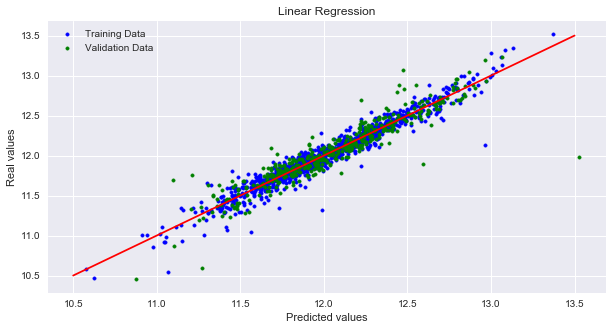

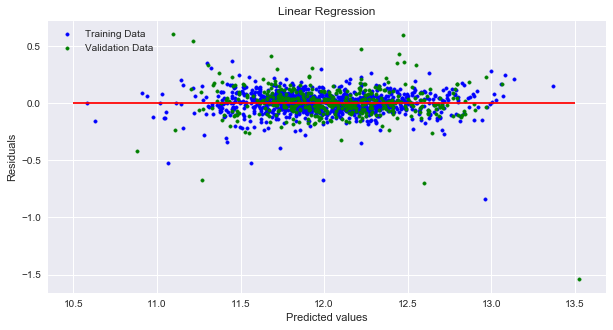

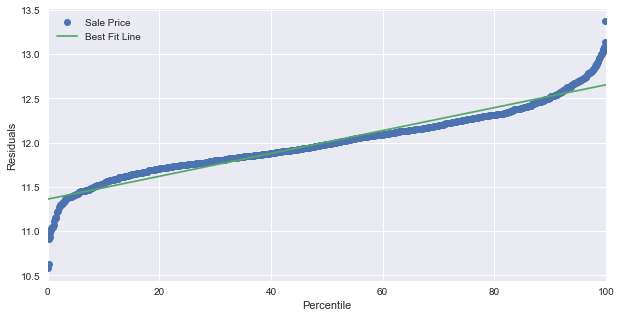

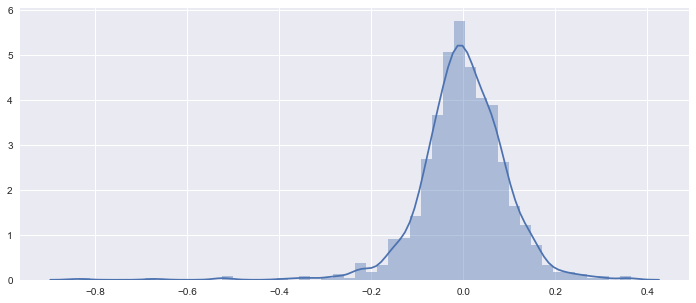

In [60]:
model_1 = lm.fit(X1_train,y1_train)
y_pred_train = lm.predict(X1_train)
y_pred_test = lm.predict(X1_test)
lm_submission = lm.predict(test)

plt.figure(figsize=(10,5))
plt.scatter(y_pred_train,y1_train, marker='.', color='blue', label = 'Training Data')
plt.scatter(y_pred_test,y1_test, marker='.', color = 'green', label = 'Validation Data')
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.title('Linear Regression')
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.legend(loc = "upper left")
plt.show()

#Assumptions or Checks

#Residual Plot: – these should show a random scattering of points, any pattern indicates a possible violation of an assumption.
plt.figure(figsize=(10,5))
plt.scatter(y_pred_train,y1_train - y_pred_train, marker='.', color='blue', label = 'Training Data')
plt.scatter(y_pred_test,y1_test - y_pred_test, marker='.', color = 'green', label = 'Validation Data')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title('Linear Regression')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.legend(loc = "upper left")
plt.show()

#Normality probability plots: – these plots should show a straight line, any pattern other than straight indicates a 
#                               possible problem of normality.
import probscale
fig, ax = plt.subplots(figsize=(10, 5))
fig = probscale.probplot(y_pred_train, ax=ax, plottype='pp', bestfit=True,
                         problabel='Percentile', datalabel='Residuals',
                         scatter_kws=dict(label='Sale Price'),
                         line_kws=dict(label='Best Fit Line'))
ax.legend(loc='upper left')
sns.despine()

residual = y1_train - y_pred_train
plt.figure(figsize=(12,5))
sns.distplot(residual)

In [44]:
# The following class was refreneced from https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Assumptions-and-Evaluation/
class Stats:
    
    def __init__(self, X1, y1, model):
        self.data = X1
        self.target = y1
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X1.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X1.shape[0] - X1.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [74]:
# The following was referenced from https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Assumptions-and-Evaluation/
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [75]:
from sklearn import metrics

print('\n'*2,"RMSE on Training set :",(np.sqrt(metrics.mean_squared_error(y1_train,y_pred_train))))

print('\n'*2,"RMSE on Testing set :",(np.sqrt(metrics.mean_squared_error(y1_test,y_pred_test))))

print('\n'*2,"Model Score: ", model_1.score(X1_test,y1_test)*100,'\n'*2)

s1 = Stats(X1_train, y1_train, model_1)
pretty_print_stats(s1)



 RMSE on Training set : 0.0957477665777


 RMSE on Testing set : 0.147479259223


 Model Score:  86.2539499 


sse:     9.3602
sst:     160.5058
r^2:     0.9417
adj_r^2: 0.9249


In [52]:
print(y_pred_train.shape,y_pred_test.shape)

(1021, 1) (438, 1)


In [ ]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures
#poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
#('linear', LinearRegression(fit_intercept=False))])
#poly.fit(X1_train, y1_train)
#pred_train = poly.predict(X1_train)
#pred_test = poly.predict(X1_test)
#Pred_submission = poly.predict(test)


In [ ]:
#PCA can be used to reduce the number of dimensions used to predict the Sale Price (Target Variable)
#from sklearn.decomposition import PCA
#pca=PCA()
#pca.fit_transform(X1)
#ratio=pca.explained_variance_ratio_
#plt.figure(figsize=(10,10))    
#plt.plot(range(1,229),ratio,'-o',color='blue',alpha=0.75)
#plt.ylim(0,1)
#plt.xlim(0,10)
#plt.grid(axis="both")
#plt.xlabel('Principal Component')
#plt.ylabel('percentages of variance in data set')
#plt.show()

Best alpha : 6.0
Try again for more precision with alphas centered around 6.0
Best alpha : 7.8


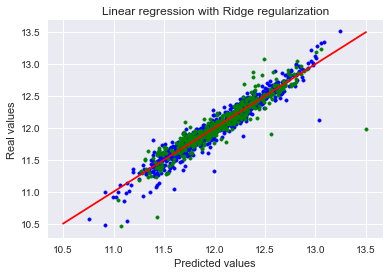

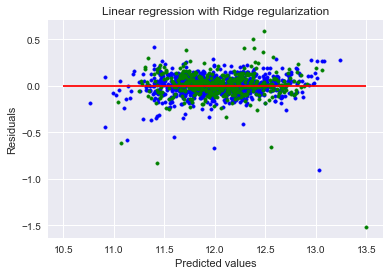

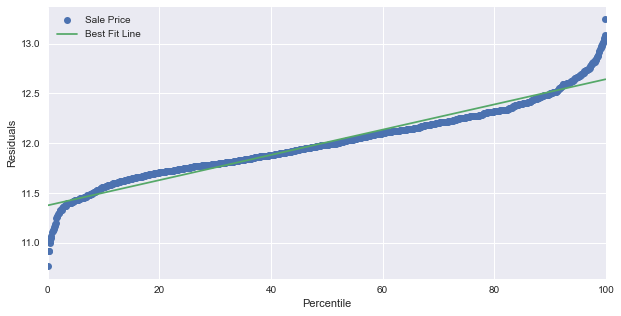

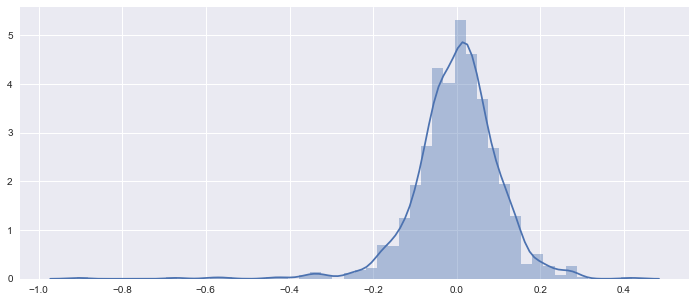

In [61]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X1_train, y1_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
model_2 = ridge.fit(X1_train, y1_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

y_pred_train_rdg = ridge.predict(X1_train)
y_pred_test_rdg = ridge.predict(X1_test)
rdg_submission = ridge.predict(test)

# Plot predictions
plt.scatter(y_pred_train_rdg, y1_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_pred_test_rdg, y1_test, c = "green", marker = ".", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot residuals
plt.scatter(y_pred_train_rdg, y1_train - y_pred_train_rdg, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_pred_test_rdg, y1_test - y_pred_test_rdg, c = "green", marker = ".", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

#Normality probability plots: – these plots should show a straight line, any pattern other than straight indicates a 
#                               possible problem of normality.
import probscale
fig, ax = plt.subplots(figsize=(10, 5))
fig = probscale.probplot(y_pred_train_rdg, ax=ax, plottype='pp', bestfit=True,
                         problabel='Percentile', datalabel='Residuals',
                         scatter_kws=dict(label='Sale Price'),
                         line_kws=dict(label='Best Fit Line'))
ax.legend(loc='upper left')
sns.despine()

residual = y1_train - y_pred_train_rdg
plt.figure(figsize=(12,5))
sns.distplot(residual)

In [73]:
print('\n'*2,"RMSE on Training set :",(np.sqrt(metrics.mean_squared_error(y1_train,y_pred_train_rdg))))

print('\n'*2,"RMSE on Testing set :",(np.sqrt(metrics.mean_squared_error(y1_test,y_pred_test_rdg))))

print('\n'*2,"Model Score: ", model_2.score(X1_test,y1_test)*100,'\n'*2)

s2 = Stats(X1_train, y1_train, model_2)
pretty_print_stats(s2)



 RMSE on Training set : 0.103964550864


 RMSE on Testing set : 0.144682053518


 Model Score:  86.770441354 


sse:     11.0356
sst:     160.5058
r^2:     0.9312
adj_r^2: 0.9115


In [ ]:
#ridge.coef_ = ridge.coef_.reshape(228)
#ridge.coef_.shape
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X1_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [64]:
print(X1_train.shape, y1_train.shape,X1_test.shape,y1_test.shape,y_train_las.shape,y_pred_train.shape)

(1021, 228) (1021, 1) (438, 228) (438, 1) (1021,) (1021, 1)


C:\Users\gteja\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006


C:\Users\gteja\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha : 0.00048


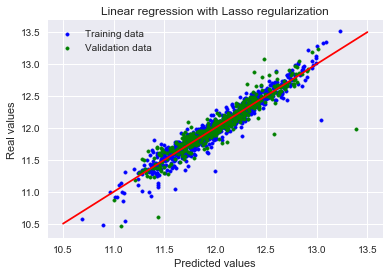

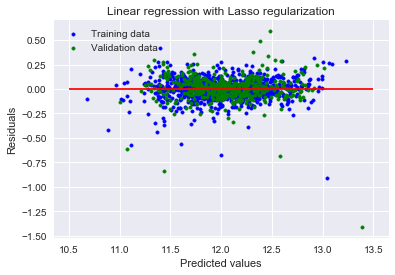

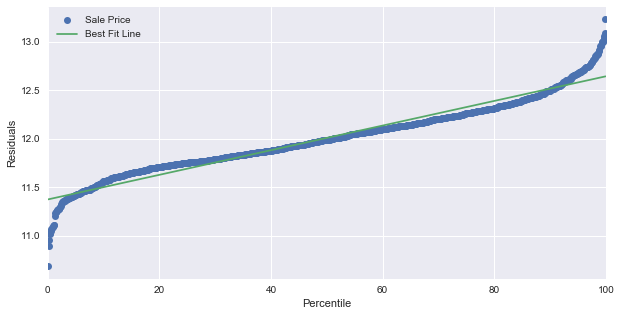

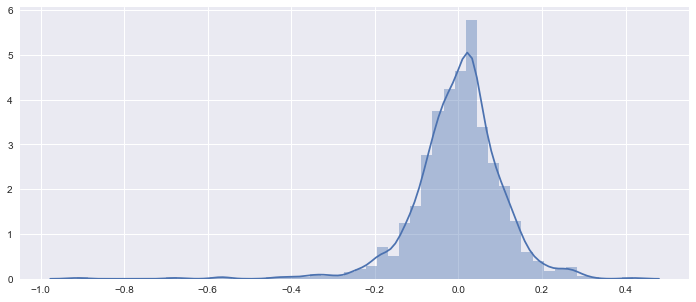

In [66]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X1_train, y1_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
model_3 = lasso.fit(X1_train, y1_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

y_pred_train_las = lasso.predict(X1_train)
y_pred_test_las = lasso.predict(X1_test)
las_submission = lasso.predict(test)
y_pred_train_las = y_pred_train_las.reshape(-1,1)
y_pred_test_las = y_pred_test_las.reshape(-1,1)

# Plot predictions
plt.scatter(y_pred_train_las, y1_train, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_pred_test_las, y1_test, c = "green", marker = ".", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot residuals
plt.scatter(y_pred_train_las, y1_train - y_pred_train_las, c = "blue", marker = ".", label = "Training data")
plt.scatter(y_pred_test_las, y1_test - y_pred_test_las, c = "green", marker = ".", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

#Normality probability plots: – these plots should show a straight line, any pattern other than straight indicates a 
#                               possible problem of normality.
import probscale
fig, ax = plt.subplots(figsize=(10, 5))
fig = probscale.probplot(y_pred_train_las, ax=ax, plottype='pp', bestfit=True,
                         problabel='Percentile', datalabel='Residuals',
                         scatter_kws=dict(label='Sale Price'),
                         line_kws=dict(label='Best Fit Line'))
ax.legend(loc='upper left')
sns.despine()

residual = y1_train - y_pred_train_las
plt.figure(figsize=(12,5))
sns.distplot(residual)

In [72]:
print('\n'*2,"RMSE on Training set :",(np.sqrt(metrics.mean_squared_error(y1_train,y_pred_train_las))))

print('\n'*2,"RMSE on Testing set :",(np.sqrt(metrics.mean_squared_error(y1_test,y_pred_test_las))))

print('\n'*2,"Model Score: ", model_3.score(X1_test,y1_test)*100,'\n'*2)

s3 = Stats(X1_train, y1_train, model_3)
pretty_print_stats(s3)



 RMSE on Training set : 0.106786669136


 RMSE on Testing set : 0.141630090427


 Model Score:  87.3226905263 


sse:     311390.3274
sst:     160.5058
r^2:     -1939.0565
adj_r^2: -2497.5576
